# Test out dominant column in relation to eigenvalues

Computational tests to determine the influence of the column with the largest L2 norm on the eigenvalues of the gram matrix. The test is performed by generating a random matrix and then scaling one of its columns to be dominant. The eigenvalues of the gram matrix are then computed and compared.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

First, we create a random matrix, A and random column vector, b. We then scale b by various factors and compute the eigenvectors of the gram matrix, G = A^T A + b b^T. We then compute the angle between the first eigenvector and the scaled column vector b. This angle is expected to be small if the column vector b is dominant in the gram matrix. 

We also compute the eigenvalues of the gram matrix and check if they are close to the square of the L2 norm of the scaled column vector b.

In [3]:
# create random matrix
m = 100  # number of columns
n = 200  # number of rows
A = np.random.rand(n, m)
A_copy = A.copy()

# create random vector
b = np.random.rand(n)

In [4]:
# angle between b and first eignevector of A
angles = []
multiple_of_b = [1, 2, 5, 10, 20, 50, 100, 200, 300, 400, 500, 700, 900, 1000]
column_to_add_to = 3
b_magnitude = []
lambda_max = []

for i in range(len(multiple_of_b)):
    added_column = b * multiple_of_b[i]
    A[:, column_to_add_to] = A_copy[:, column_to_add_to] + added_column
    
    u, v = np.linalg.eig(A @ A.T)

    angle = np.arccos(np.dot(b, v[:, 0]) / (np.linalg.norm(b) * np.linalg.norm(v[:, 0])))
    # in degrees

    angles.append(angle)
    b_magnitude.append(np.linalg.norm(added_column))
    lambda_max.append(u[0])

d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Largest eigenvalue of A vs. magnitude of b')

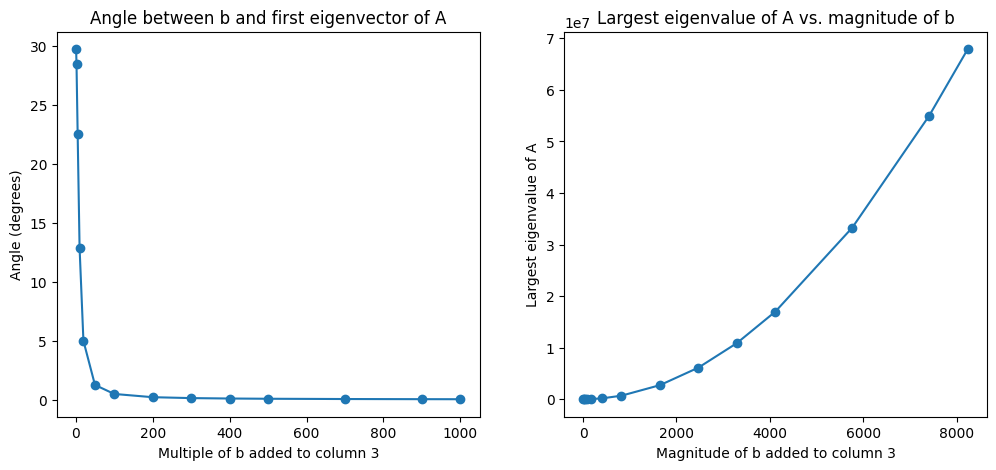

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(multiple_of_b, [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles], marker='o')
plt.xlabel('Multiple of b added to column 3')
plt.ylabel('Angle (degrees)')
plt.title('Angle between b and first eigenvector of A')
plt.subplot(1, 2, 2)
plt.plot(b_magnitude, lambda_max, marker='o')
plt.xlabel('Magnitude of b added to column 3')
plt.ylabel('Largest eigenvalue of A')
plt.title('Largest eigenvalue of A vs. magnitude of b')
# plt.xscale('log')

## Testing for the case where b is added to all columns of A

We are doing the same thing as above, but now we are adding the column vector b to all columns of A.

In [117]:
angles_all = []
b_magnitude_all = []
lambda_max_all = []


for i in range(len(multiple_of_b)):
    added_column = b * multiple_of_b[i]
    b_magnitude_all.append(np.linalg.norm(added_column))
    # tile the added column to match the shape of A
    added_column = np.tile(added_column, (m, 1)).T
    A = A_copy + added_column
    
    u, v = np.linalg.eig(A @ A.T)

    # angle = np.arccos(np.dot(A[:,0], v[:, 0]) / (np.linalg.norm(A[:,0]) * np.linalg.norm(v[:, 0])))
    angle = np.arccos(np.dot(b, v[:, 0]) / (np.linalg.norm(b) * np.linalg.norm(v[:, 0])))
    # in degrees

    angles_all.append(angle)
    lambda_max_all.append(u[0])

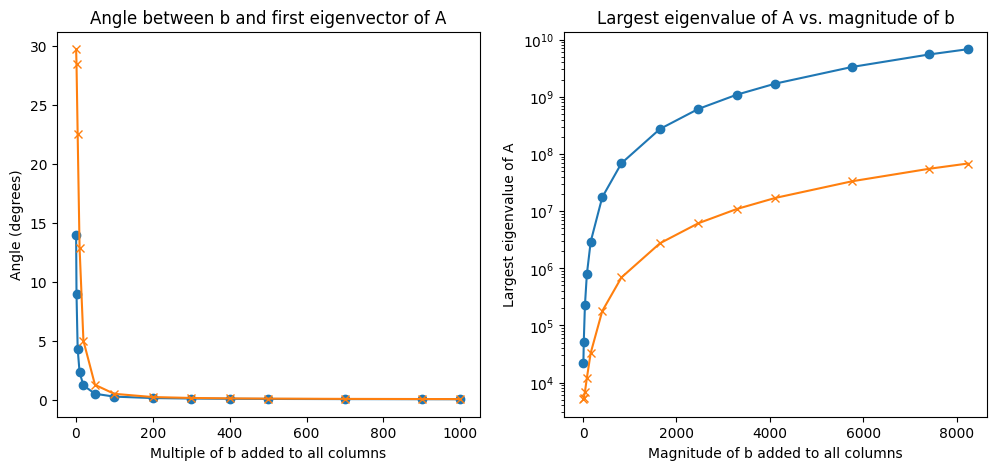

In [118]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(multiple_of_b, [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles_all], marker='o')
plt.plot(multiple_of_b, [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles], marker='x')
plt.xlabel('Multiple of b added to all columns')
plt.ylabel('Angle (degrees)')
plt.title('Angle between b and first eigenvector of A')
# plt.xscale('log')
plt.subplot(1, 2, 2)
plt.plot(b_magnitude_all, lambda_max_all, marker='o', label='added to all columns')
plt.plot(b_magnitude, lambda_max, marker='x', label='added to one column')
plt.xlabel('Magnitude of b added to all columns')
plt.ylabel('Largest eigenvalue of A')
plt.title('Largest eigenvalue of A vs. magnitude of b')
plt.yscale('log')

Now we can take a look at the relationship between the angles computed in the case where b is added to all columns of A and the case where b is added to only one column of A. From above the angle for the former case gets small faster but we want to see if there is a consistent relationship between the two angles. We can do this by plotting the angles for both cases against each other.

Text(0, 0.5, 'Angle between b and first eigenvector of A (added to all columns)')

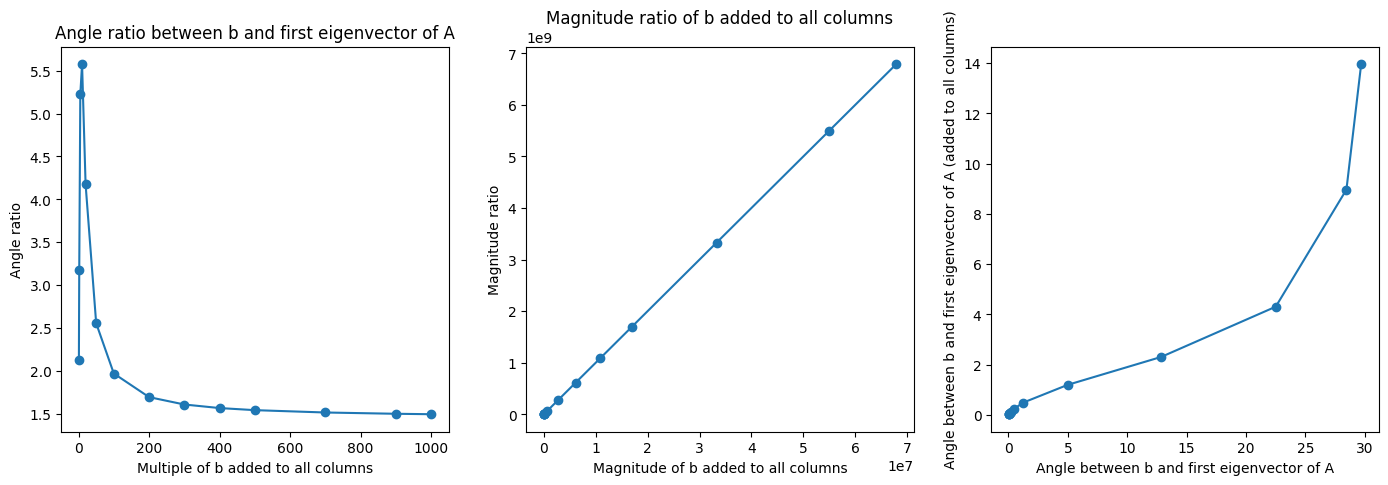

In [119]:
magnitude_ratio = [a / b for a, b in zip(lambda_max, lambda_max_all)]
plot_angles = [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles]
plot_angles_all = [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles_all]
angle_ratio = [a / b for a, b in zip(plot_angles, plot_angles_all)]

plt.figure(figsize=(17, 5))
plt.subplot(1, 3, 1)
plt.plot(multiple_of_b, angle_ratio, marker='o')
plt.xlabel('Multiple of b added to all columns')
plt.ylabel('Angle ratio')
plt.title('Angle ratio between b and first eigenvector of A')
plt.subplot(1, 3, 2)
# plt.plot(b_magnitude_all, magnitude_ratio, marker='o')
plt.plot(lambda_max, lambda_max_all, marker='o')
plt.xlabel('Magnitude of b added to all columns')
plt.ylabel('Magnitude ratio')
plt.title('Magnitude ratio of b added to all columns')
# plt.xscale('log')
plt.subplot(1, 3, 3)
plt.plot(plot_angles, plot_angles_all, marker='o')
plt.xlabel('Angle between b and first eigenvector of A')
plt.ylabel('Angle between b and first eigenvector of A (added to all columns)')


Now, we are going to test the magnitude of the column after b is added. We start with the assumption that without the added column, all the columns of A are of the same magnitude and can be represented in terms of the number of columns, n i.e. $\|a_i\|_2^2 = \frac{\|A\|_F^2}{n}$. That would make the ratio of this to the 

In [27]:
n = [1, 2, 3, 4, 5, 6, 8, 10, 15, 20, 30, 40, 50, 100]
s = [0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10, 15, 20, 25]
f = np.zeros((len(n), len(s)))
f2 = np.zeros((len(n), len(s)))
for i in range(len(n)):
    for j in range(len(s)):
        # f2[i, j] = 1 / (n[i] * (1 + s[j]))
        f2[i, j] = 1 / (n[i] + s[j])
for i in range(len(n)):
    for j in range(len(s)):
        f[i, j] = (1 + s[j]) / (n[i] + s[j])

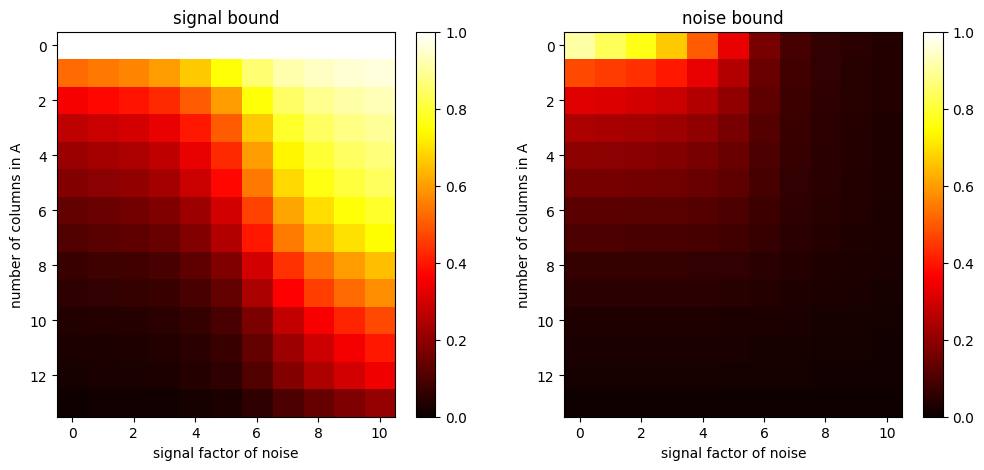

In [28]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(f, cmap='hot', vmax=1, vmin=0, aspect='auto')
plt.title('signal bound')
plt.xlabel('signal factor of noise')
plt.ylabel('number of columns in A')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(f2, cmap='hot', vmax=1, vmin=0, aspect='auto')
plt.title('noise bound')
plt.xlabel('signal factor of noise')
plt.ylabel('number of columns in A')
plt.colorbar()

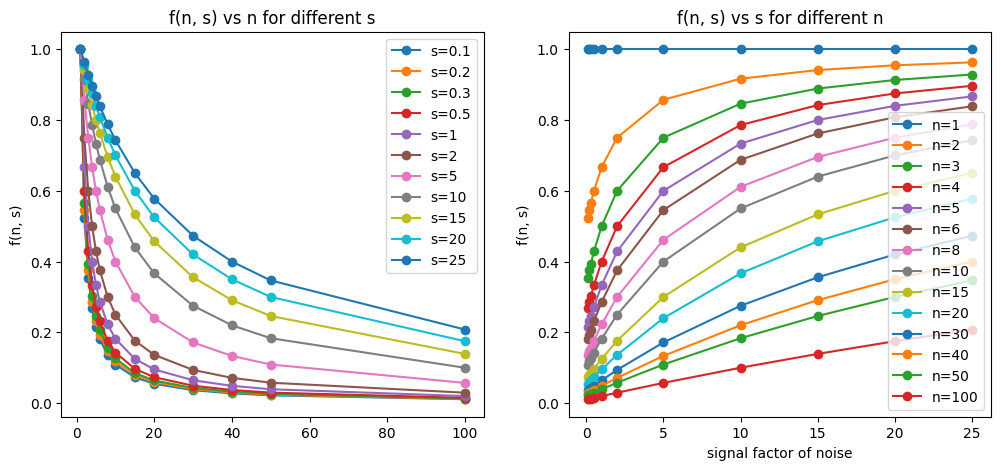

In [29]:
# plt.plot(n, f[:, 0], marker='o', label='s=1')
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i in range(len(s)):
    plt.plot(n, f[:, i], marker='o', label=f's={s[i]}')
plt.ylabel('number of columns in A')
plt.ylabel('f(n, s)')
plt.title('f(n, s) vs n for different s')
plt.legend()
plt.subplot(1, 2, 2)
for i in range(len(n)):
    plt.plot(s, f[i], marker='o', label=f'n={n[i]}')
plt.xlabel('signal factor of noise')
plt.ylabel('f(n, s)')
plt.title('f(n, s) vs s for different n')
plt.legend()

Text(0.5, 1.0, 'f(betta) vs betta')

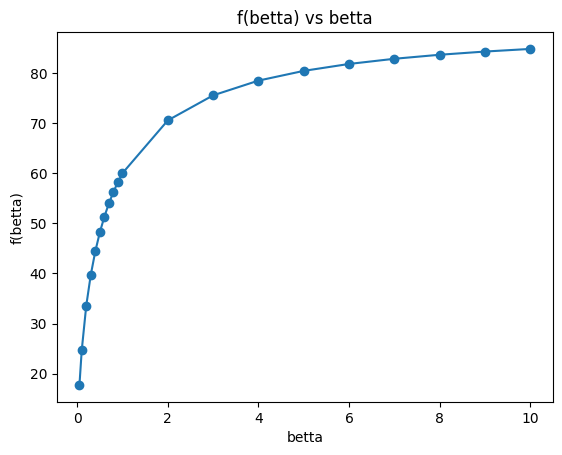

In [10]:
betta = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
f_betta = np.zeros(len(betta))
for i in range(len(betta)):
    f_betta[i] = math.degrees(np.arccos(1 / (1 + betta[i])))
plt.figure()
plt.plot(betta, f_betta, marker='o')
plt.xlabel('betta')
plt.ylabel('f(betta)')
plt.title('f(betta) vs betta')

## Makes tests for real data



In [30]:
import os
import sys

sys.path.append("../")
sys.path.append(os.path.join(os.path.dirname(""), os.pardir))
import coherence_analysis.utils as f

In [31]:
start_ch = 3100
nchannels = 2000
nsensors = 200

In [ ]:
file = r"D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160314083818.h5"
data, _ = f.load_brady_hdf5(file, normalize="no")

file = r"D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160314083848.h5"
data2, _ = f.load_brady_hdf5(file, normalize="no")

data = np.append(data, data2, axis=1)

file = r"D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160314083918.h5"
data2, _ = f.load_brady_hdf5(file, normalize="no")

# data = np.append(data, data2, axis=1)

data = np.append(data, data2[:, :10000], axis=1)
coherence_data = data[start_ch : nchannels + start_ch : int(nchannels / nsensors)]

In [41]:
win_len = 2.5
overlap = 0
samples_per_sec = 1000

norm_win_spectra, frequencies = f.normalised_windowed_spectra(
    coherence_data, win_len, overlap, sample_interval=1 / samples_per_sec
)

welch_coherence_mat = np.matmul(
    norm_win_spectra, np.conjugate(norm_win_spectra.transpose(0, 2, 1))
)
coherence = np.absolute(welch_coherence_mat) ** 2

In [42]:
num_frames = norm_win_spectra.shape[0]
eig_ratios_coherence = np.empty(num_frames)
eig_ratios_coherence_qr = np.empty(num_frames)

for d in range(1,num_frames):
    # U, S, Vh = np.linalg.svd(win_spectra_noise[d])
        S = np.linalg.svd(
                norm_win_spectra[d],
                compute_uv=False,
                hermitian=False,
            )
        svd_approx2 = S**2
        # svd_approx2 = np.sort(S)[::-1]**2
        eig_ratios_coherence[d] = np.max(svd_approx2) / np.sum(svd_approx2)

        Q, R = np.linalg.qr(norm_win_spectra[d])
        # RRH = R @ (np.matrix(R).H)
        # diag is of sqrt(RR^*)
        # qr_approx2 = np.power(np.diag(RRH), 1)
        qr_approx2 = np.sum(np.multiply(R, np.conjugate(R)).real, axis=1)
        eig_ratios_coherence_qr[d] = np.max(qr_approx2) / np.sum(qr_approx2)

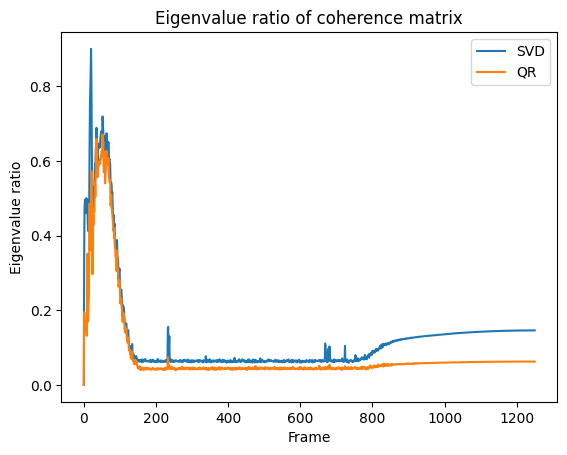

In [43]:
plt.plot(
    eig_ratios_coherence,
    label="SVD",
)
plt.plot(
    eig_ratios_coherence_qr,
    label="QR",
)
plt.xlabel("Frame")
plt.ylabel("Eigenvalue ratio")
plt.title("Eigenvalue ratio of coherence matrix")
plt.legend()

In [58]:
np.where(eig_ratios_coherence > 0.2)[0]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 109, 110, 111], dtype=int64)

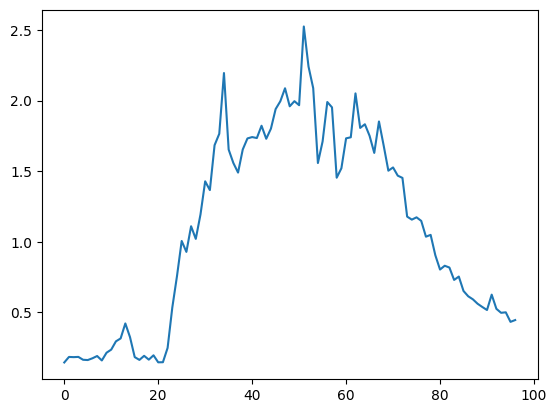

In [104]:
max_norm = max(np.linalg.norm(norm_win_spectra[1], axis=0))
other_norm = np.sum(np.linalg.norm(norm_win_spectra[1], axis=0)) * max_norm - max_norm**2
max_norm / other_norm

relevant = np.where(eig_ratios_coherence > 0.3)[0]
ratios = np.zeros(len(relevant))

for a in range(len(relevant)):
    max_norm = max(np.linalg.norm(norm_win_spectra[relevant[a]], axis=0)**2)
    other_norm = np.sum(np.linalg.norm(norm_win_spectra[relevant[a]], axis=0)**2) - max_norm
    ratios[a] = max_norm / other_norm

plt.plot(ratios)

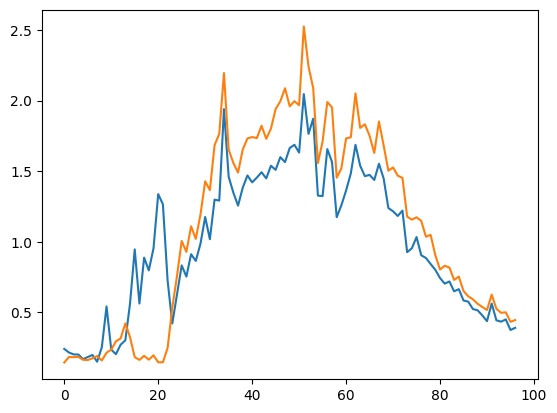

In [105]:
r_ratios = np.zeros(len(relevant))

for a in range(len(relevant)):
    Q, R = np.linalg.qr(norm_win_spectra[relevant[a]])
    
    max_norm = max(np.linalg.norm(R, axis=1))**2
    other_norm = np.sum(np.linalg.norm(R, axis=1)**2) - max_norm
    r_ratios[a] = max_norm / other_norm

plt.plot(r_ratios)
plt.plot(ratios)

In [100]:
Q, R = np.linalg.qr(norm_win_spectra[28])
np.linalg.norm(R, axis=1)**2

array([ 5.15521166,  2.14035538,  4.89019008,  3.15496368,  5.59301058,
        5.83288465,  4.08287802,  2.61344345,  2.04419625,  1.54600048,
        1.64360888,  3.48091073,  1.54557302,  2.81070849,  2.09082602,
        1.78166967,  2.47362456,  2.1372654 ,  3.25437148, 95.4173897 ,
       26.61888238,  3.76242578,  1.80559658,  1.83160692,  1.54854407,
        1.53569242,  3.93283166,  5.27533805])

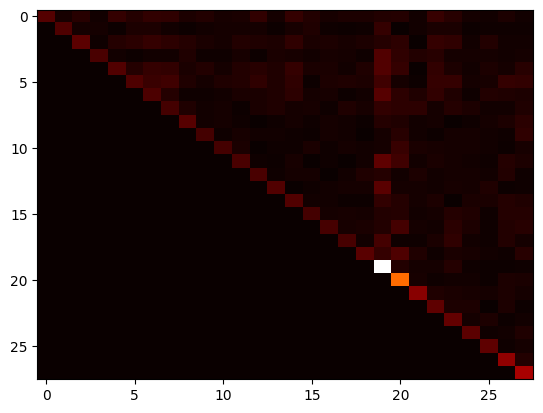

In [98]:
Q, R = np.linalg.qr(norm_win_spectra[28])
plt.imshow(np.abs(R), cmap="hot", aspect="auto")
# plt.plot(np.linalg.norm(R, axis=1)**2, marker="o", label="norm(R)")

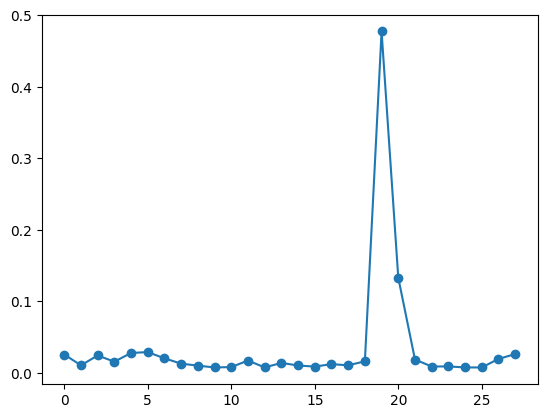

In [99]:
qr_approx2 = np.sum(np.multiply(R, np.conjugate(R)).real, axis=1)
# max(qr_approx2) / np.sum(np.absolute(qr_approx2))
# plt.plot(qr_approx2, marker="o", label="QR approx")
plt.plot(qr_approx2 / np.sum(np.absolute(qr_approx2)), marker="o", label="QR approx")